In [3]:
%load_ext pycodestyle_magic

# Arxiv Scraper Library

[Arxiv Scraper](https://github.com/mahdisadjadi/arxivscraper)

In [12]:
# %%pycodestyle

import os
import pandas as pd
import numpy as np
from collections import defaultdict

import seaborn as sns
import matplotlib.pyplot as plt

# Reference : https://arxiv.org/archive/cs

cs_arxiv_cat = {}

cs_arxiv_cat['cs.ai'] = 'Artificial Intelligence'
cs_arxiv_cat['cs.cl'] = 'Computation and Language'
cs_arxiv_cat['cs.cc'] = 'Computational Complexity'
cs_arxiv_cat['cs.ce'] = 'Computational Engineering, Finance, and Science'
cs_arxiv_cat['cs.cg'] = 'Computational Geometry'
cs_arxiv_cat['cs.gt'] = 'Computer Science and Game Theory'
cs_arxiv_cat['cs.cv'] = 'Computer Vision and Pattern Recognition'
cs_arxiv_cat['cs.cy'] = 'Computers and Society'
cs_arxiv_cat['cs.cr'] = 'Cryptography and Security'
cs_arxiv_cat['cs.ds'] = 'Data Structures and Algorithms'
cs_arxiv_cat['cs.db'] = 'Databases'
cs_arxiv_cat['cs.dl'] = 'Digital Libraries'
cs_arxiv_cat['cs.dm'] = 'Discrete Mathematics'
cs_arxiv_cat['cs.dc'] = 'Distributed, Parallel, and Cluster Computing'
cs_arxiv_cat['cs.et'] = 'Emerging Technologies'
cs_arxiv_cat['cs.fl'] = 'Formal Languages and Automata Theory'
cs_arxiv_cat['cs.et'] = 'Emerging Technologies'
cs_arxiv_cat['cs.gl'] = 'General Literature'
cs_arxiv_cat['cs.gr'] = 'Graphics'
cs_arxiv_cat['cs.ar'] = 'Hardware Architecture'
cs_arxiv_cat['cs.hc'] = 'Human-Computer Interaction'
cs_arxiv_cat['cs.ir'] = 'Information Retrieval'
cs_arxiv_cat['cs.it'] = 'Information Theory'
cs_arxiv_cat['cs.lo'] = 'Logic in Computer Science'
cs_arxiv_cat['cs.lg'] = 'Machine Learning'
cs_arxiv_cat['cs.ms'] = 'Mathematical Software'
cs_arxiv_cat['cs.ma'] = 'Multiagent Systems'
cs_arxiv_cat['cs.mm'] = 'Multimedia'
cs_arxiv_cat['cs.ni'] = 'Networking and Internet Architecture'
cs_arxiv_cat['cs.ne'] = 'Neural and Evolutionary Computing'
cs_arxiv_cat['cs.na'] = 'Numerical Analysis'
cs_arxiv_cat['cs.os'] = 'Operating Systems'
cs_arxiv_cat['cs.oh'] = 'Other Computer Science'
cs_arxiv_cat['cs.pf'] = 'Performance'
cs_arxiv_cat['cs.pl'] = 'Programming Languages'
cs_arxiv_cat['cs.ro'] = 'Robotics'
cs_arxiv_cat['cs.si'] = 'Social and Information Networks'
cs_arxiv_cat['cs.se'] = 'Software Engineering'
cs_arxiv_cat['cs.sd'] = 'Sound'
cs_arxiv_cat['cs.sc'] = 'Symbolic Computation'
cs_arxiv_cat['cs.sy'] = 'Systems and Control'

sns.set(style="darkgrid")

DIR_PATH = '/home/anneke/Documents/ann-mitchell-text-classification/dataset/arxiv/'

data = pd.DataFrame()
for root, dirs, files in os.walk(DIR_PATH, topdown=False):
    for name in files:
        df = pd.read_csv(os.path.join(root, name))
        data = pd.concat([data, df])

year = ['20{:02d}'.format(i) for i in range(9,20)]

## Data distribution analysis

### By year

## Note that 2019 is only for 6 months span

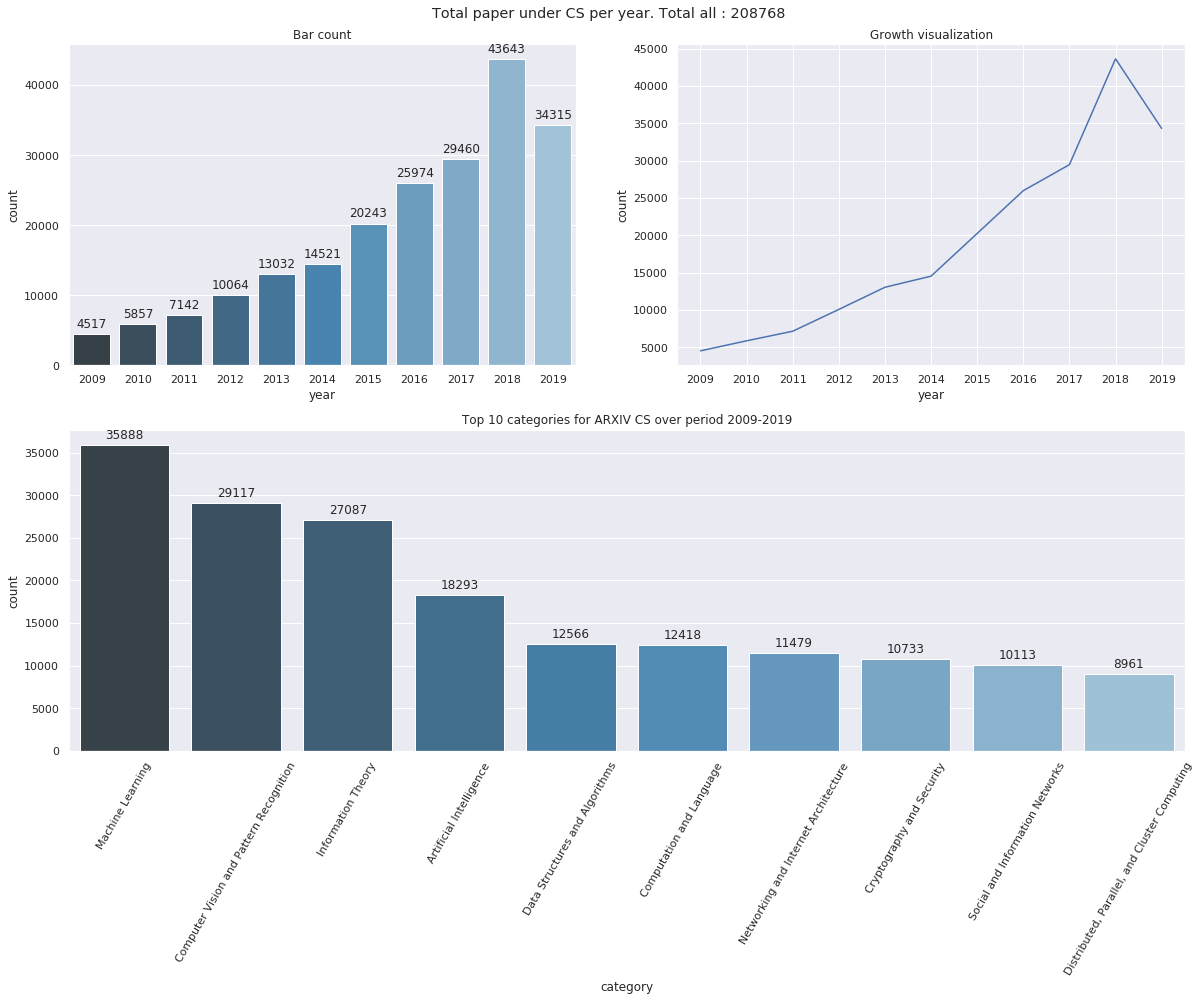

In [281]:
year_paper_count = dict()
categories_count = defaultdict(int)

for y in year:
    year_paper_count[y] = 0
    ABS_PATH = os.path.abspath(os.path.join(DIR_PATH, y))
    dir_list = os.listdir(ABS_PATH)
    for d in dir_list:
        data_obj = pd.read_csv(os.path.join(ABS_PATH, d))
        # Count per year
        year_paper_count[y] += len(data_obj) 
        
        # categories
        data_obj = data_obj['categories']
        for d in data_obj:
            for w in d.split(' '):
                if 'physics' not in w:
                    if 'cs.' in w:
                        categories_count[w] += 1

categories = sorted(categories_count.items(), key=lambda x:x[1], reverse=True)
categories = [(cs_arxiv_cat[x[0].lower()], x[1]) for x in categories]

df_year = pd.DataFrame({'year': year, 'count':[year_paper_count[y] for y in year]})
df_categories = pd.DataFrame({'category':[c[0] for c in categories[:10]],
                             'count':[c[1] for c in categories[:10]]})

plt.figure(figsize=(20,13))
plt.suptitle('Total paper under CS per year. Total all : {}'.format(len(data)), y=.92)

sub = plt.subplot(2, 2, 1)
sub.set_title('Bar count')
ax = sns.barplot(x="year", y="count", data=df_year, palette="Blues_d")
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

sub = plt.subplot(2, 2, 2)  
sub.set_title('Growth visualization')
ax = sns.lineplot(x="year", y="count", data=df_year)

sub = plt.subplot(2,1,2)
sub.set_title('Top 10 categories for ARXIV CS over period 2009-2019')
ax = sns.barplot(x="category", y="count", data=df_categories, palette="Blues_d")
ax.set_xticklabels(rotation=60, labels=df_categories['category'])
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

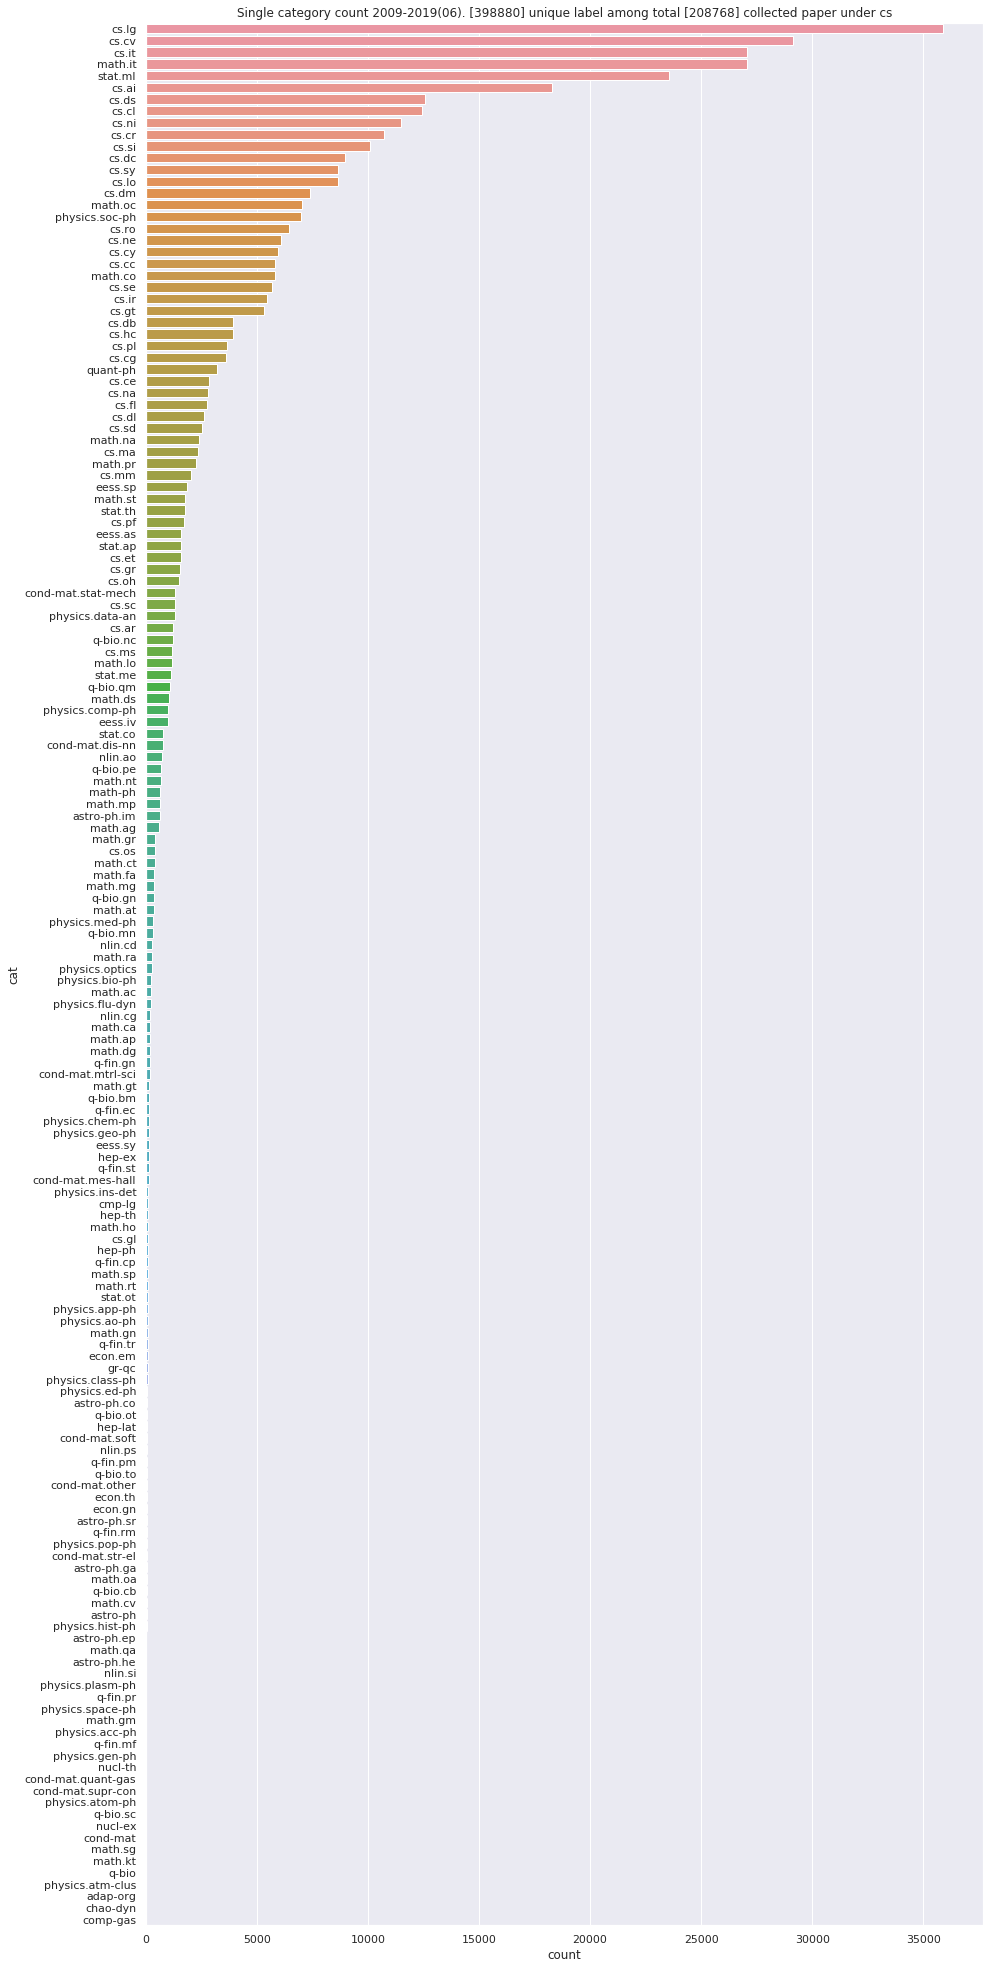

In [286]:
def label_mapping(label):
    return sorted(label.split(' '))

data['categories'] = data['categories'].apply(label_mapping)

single_category = []

for d in data['categories']:
    for i in d:
        single_category.append(i)

c = Counter(single_category)


single_category_df = pd.DataFrame({'cat':[x[0] for x in c.most_common()],
                                  'count':[x[1] for x in c.most_common()]})

plt.figure(figsize=(15, 35))
plt.title('Single category count 2009-2019(06). [{}] unique label among total [{}] collected paper under cs'.format(len(single_category), len(data)))
ax = sns.barplot(x="count", y="cat", data=single_category_df)
# ax.set_yticklabels(rotation=90, labels=single_category_df['cat'])

In [7]:
def label_mapping(label):
    return sorted(label.split(' '))

# data['categories'] = data['categories'].apply(label_mapping)

single_category = []

for d in data['categories']:
    ai_crypto = []
    
    if 'cs.ai' in d:
        ai_crypto.append('cs.ai')
    if 'cs.cr' in d:
        ai_crypto.append('cs.cr')
    single_category.append((len(ai_crypto), ' '.join(ai_crypto)))




# single_category_df = pd.DataFrame({'cat':[x[0] for x in c.most_common()],
#                                   'count':[x[1] for x in c.most_common()]})

# plt.figure(figsize=(15, 35))
# plt.title('Single category count 2009-2019(06). [{}] unique label among total [{}] collected paper under cs'.format(len(single_category), len(data)))
# ax = sns.barplot(x="count", y="cat", data=single_category_df)
# # ax.set_yticklabels(rotation=90, labels=single_category_df['cat'])

In [8]:
np.sum([s[0] for s in single_category])

29026

In [9]:
each_cat = np.array([s[0] for s in single_category])

In [10]:
np.sum(each_cat == 1), np.sum(each_cat == 2)

(28396, 315)

In [12]:
# need to plot between ai and crypto and both 
from collections import Counter

co = Counter(single_category)

In [24]:
group = co.most_common()
group

[((0, ''), 180057),
 ((1, 'cs.ai'), 17978),
 ((1, 'cs.cr'), 10418),
 ((2, 'cs.ai cs.cr'), 315)]

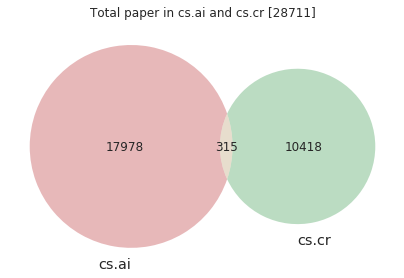

In [42]:
from matplotlib_venn import venn2

plt.figure(figsize=(7,7))
venn2(subsets = (group[1][1], group[2][1], group[3][1]), set_labels = ('cs.ai', 'cs.cr'))
plt.title('Total paper in cs.ai and cs.cr [{}]'.format(np.sum([i[1] for i in group[1:]])))
plt.show()


In [33]:
indices = np.where(np.array([s[0] for s in single_category]) == 1)[0]

In [34]:
indices.shape

(28396,)

In [39]:
# we got indices. 
# Now let's see what kind of words do they have.

X_ = data.iloc[indices]

In [40]:
# Let's put on parquet file for ease access

X_.head()

,id,title,categories,abstract,doi,created,updated,authors
23,1012.0065,counting in graph covers: a combinatorial char...,cs.it cond-mat.stat-mech cs.ai math.co math.it,we present a combinatorial characterization of...,10.1109/tit.2013.2264715,2010-11-30,2012-10-09,['vontobel']
34,1108.2283,a survey on independence-based markov networks...,cs.ai cs.lg,this work reports the most relevant technical ...,10.1007/s10462-012-9346-y,2011-08-10,2013-11-20,['schlüter']
36,1108.5935,the rabin cryptosystem revisited,math.nt cs.cr cs.it math.it,the rabin public-key cryptosystem is revisited...,NaN,2011-08-30,2013-11-03,"['elia', 'piva', 'schipani']"
69,1205.4778,backscatter from the data plane --- threats to...,cs.ni cs.cr,information-centric networking proposals attra...,10.1016/j.comnet.2013.07.009,2012-05-21,2012-09-02,"['wählisch', 'schmidt', 'vahlenkamp']"
86,1208.2076,upper bounds on the number of codewords of som...,cs.it cs.cr math.it,separating codes have their applications in co...,NaN,2012-08-09,2013-11-21,"['kim', 'sin', 'song']"


In [45]:
# Need to change column id to byte
X_['id'] = X_['id'].astype(str)
X_.to_parquet('./dataset/arxiv_ai_crypto_data.parquet')

/home/anneke/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [56]:
data['id'] = data['id'].astype(str)

In [57]:
data.to_parquet('./dataset/arxiv_cs_09_19_data.parquet')

# Test AI VS Crypto

## Let's exclude papers with both.

### Data split on (1./3) 

In [17]:
X_ = pd.read_parquet('./dataset/arxiv_ai_crypto_data.parquet')

In [18]:
def apply_categories(data, labels=['cs.ai', 'cs.cr']):
    '''
        Need to make sure that there is no overlap between these categories first!
    '''
    
    for l in labels:
        if l in data.split(' '):
            return l

X_['categories'] = X_['categories'].apply(apply_categories)

In [19]:
# Split data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_['abstract'], X_['categories'], test_size=(1./3), random_state=42)

In [20]:
X_train = list(X_train)
X_test = list(X_test)

In [21]:
from nltk.tokenize import word_tokenize

X_train = [word_tokenize(text) for text in X_train]
X_test = [word_tokenize(text) for text in X_test]

In [24]:
type(X_train)

list

In [25]:
to_binary = {'cs.ai':1, 'cs.cr':0}
y_train = y_train.apply(lambda x: to_binary[x])

In [26]:
y_test = y_test.apply(lambda x: to_binary[x])

## Test logistic regression

In [27]:
from utils import utils

X_train, X_test, cv = utils.vectorize_keywords_docs(X_train, X_test, return_cv=True)

In [28]:
len(cv.vocabulary_)

2565

In [29]:
import sklearn

clf = sklearn.linear_model.LogisticRegression()
clf.fit(X_train['docs'], y_train)

weight = clf.coef_[0]
words = cv.get_feature_names()

crypto_indices = np.argsort(weight)
ai_indices = crypto_indices[::-1]

/home/anneke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [41]:
# %%pycodestyle

threshold = 300
k_ai = []
k_crypto = []
w_ai = []
w_crypto = []

print('-'*10,
      '{} KEYWORD ASSOCIATED WITH [cs.ai and cs.cr] CATEGORY'.format(threshold))
print('\t{:<20}\t\t{:<20}'.format('cs.ai', 'cs.cr'))

for i, (ai, crypto) in enumerate(zip(ai_indices[:threshold], 
                                     crypto_indices[:threshold])):
#     print('{:03d}\t{:<20}\t{:.3f}\t{:<20}\t{:.3f}'.format(i+1,
#                                                           words[ai],
#                                                           weight[ai],
#                                                           words[crypto],
#                                                           weight[crypto]))
    k_ai.append(words[ai])
    k_crypto.append(words[crypto])
    w_ai.append(weight[ai])
    w_crypto.append(weight[crypto])

scisport_df = pd.DataFrame({'sci/tech_k':  k_ai,
                            'sci/tech_w': w_ai,
                            'sports_k': k_crypto,
                            'sports_w': w_crypto})

---------- 300 KEYWORD ASSOCIATED WITH [cs.ai and cs.cr] CATEGORY
	cs.ai               		cs.cr               


In [31]:
# scisport_df

In [34]:
clf.score(X_train['docs'], y_train), clf.score(X_test['docs'], y_test)

(0.9952984680401479, 0.9538347770969786)

## Processing all keywords for Arxiv (AI vs Crypto)

In [73]:
import json

KEYWORD_DIR = "/home/anneke/Documents/ann-mitchell-text-classification/data/arxiv-aicrypto-keywords"

filelist = os.listdir(KEYWORD_DIR)

arxiv_keyword = {}
arxiv_keyword['100'] = {}
arxiv_keyword['200'] = {}
arxiv_keyword['300'] = {}

keys = {}

for file in filelist:
    with open(os.path.join(KEYWORD_DIR, file), 'r') as text:
        file_token = file[:-4].split('-')

        f = text.readlines()
        keylist = []
        for l in f:
            keylist.append(l.strip())

        arxiv_keyword[file_token[-1]][file_token[-2]] = keylist
        
for i in range(100, 301, 100):
    arxiv_keyword[str(i)]['summary'] = {}
    arxiv_keyword[str(i)]['summary']['total_ai'] = len(arxiv_keyword[str(i)]['ai'])
    arxiv_keyword[str(i)]['summary']['total_crypto'] = len(arxiv_keyword[str(i)]['crypto'])
    arxiv_keyword[str(i)]['summary']['total'] = arxiv_keyword[str(i)]['summary']['total_ai'] + arxiv_keyword[str(i)]['summary']['total_crypto']
    
for i in range(100, 301, 100):
    print(arxiv_keyword[str(i)]['summary'])
    
# save to JSON file
with open(os.path.join(KEYWORD_DIR, 'arxiv_keywords.json'), 'w') as json_file:
    json.dump(arxiv_keyword, json_file, indent=4)

{'total_ai': 31, 'total_crypto': 40, 'total': 71}
{'total_ai': 59, 'total_crypto': 67, 'total': 126}
{'total_ai': 85, 'total_crypto': 82, 'total': 167}


In [76]:
arxiv_dict = {}
arxiv_dict['length'] = []
arxiv_dict['ai'] = []
arxiv_dict['crypto'] = []
arxiv_dict['total'] = []


for i in range(100, 301, 100):
    arxiv_dict['length'].append(i)
    arxiv_dict['ai'].append(arxiv_keyword[str(i)]['summary']['total_ai'])
    arxiv_dict['crypto'].append(arxiv_keyword[str(i)]['summary']['total_crypto'])
    arxiv_dict['total'].append(arxiv_keyword[str(i)]['summary']['total'])

In [77]:
arxiv_df = pd.DataFrame(arxiv_dict)
arxiv_df

,length,ai,crypto,total
0,100,31,40,71
1,200,59,67,126
2,300,85,82,167


## Full view on keywords

In [95]:
keyword = {}

for i in range(100, 301, 100):
    keyword[str(i)] = sorted(arxiv_keyword[str(i)]['ai'] + arxiv_keyword[str(i)]['crypto'])
    
max_len = len(keyword['300'])
keyword['100'] = keyword['100'] + ([np.nan] * (max_len-len(keyword['100'])))
keyword['200'] = keyword['200'] + ([np.nan] * (max_len-len(keyword['200'])))
df = pd.DataFrame(keyword)